In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image as keras_image
import face_recognition

In [2]:
# Path

train = ""

In [3]:
#read dataset for training
def load_data_from_folder(folder_path):
    images = []
    labels = []

    for name in os.listdir(folder_path):
        path = os.path.join(folder_path, name)
        if os.path.isdir(path):
            for filename in os.listdir(path):
                if filename.endswith('.jpg'):
                    image = cv2.imread(os.path.join(path, filename))
                    images.append(image)
                    labels.append(name)

    return images, labels

In [4]:
data_x, data_y = load_data_from_folder(train)

In [5]:
data_x = np.array(data_x)
data_y = np.array(data_y)

In [6]:
label_encoder = LabelEncoder()
data_y = label_encoder.fit_transform(data_y)

In [7]:
np.unique(data_y)

array([0, 1, 2, 3])

In [8]:
data_x = data_x / 255.0

In [9]:
data_x

array([[[[0.42352941, 0.42352941, 0.42352941],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         [0.24705882, 0.24705882, 0.24705882],
         ...,
         [0.17647059, 0.17647059, 0.17647059],
         [0.18823529, 0.18823529, 0.18823529],
         [0.34509804, 0.34509804, 0.34509804]],

        [[0.45098039, 0.45098039, 0.45098039],
         [0.35294118, 0.35294118, 0.35294118],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         ...,
         [0.13333333, 0.13333333, 0.13333333],
         [0.18039216, 0.18039216, 0.18039216],
         [0.17647059, 0.17647059, 0.17647059]],

        [[0.50196078, 0.50196078, 0.50196078],
         [0.40784314, 0.40784314, 0.40784314],
         [0.36470588, 0.36470588, 0.36470588],
         ...,
         [0.09019608, 0.09019608, 0.09019608],
         [0.18431373, 0.18431373, 0.18431373],
         [0.19607843, 0.19607843, 0.19607843]],

        ...,

        [[0.04705882, 0.04705882, 0.04705882],
         [0.11764706, 0.11764706, 0.11764706]

# Inception

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

In [11]:
inception_model = models.Sequential([
    layers.InputLayer((48, 48, 3)),
    
    layers.Conv2D(64, (7, 7), strides=(2, 2)),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    
    layers.Conv2D(192, (3, 3), strides=(1, 1)),
    LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((3, 3), strides=(2, 2)),
    
    # inception layer 1
    layers.Conv2D(64, (1, 1), padding='same'),
    LeakyReLU(alpha=0.1),
    layers.Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(alpha=0.1),
    layers.Conv2D(96, (1, 1), padding='same'),
    LeakyReLU(alpha=0.1),
    layers.Conv2D(32, (5, 5), padding='same'),
    LeakyReLU(alpha=0.1),
    layers.Conv2D(16, (1, 1), padding='same'),
    LeakyReLU(alpha=0.1),
    
    layers.MaxPooling2D((2, 2), strides=(2, 2)),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(4096),
    LeakyReLU(alpha=0.1),
    layers.Dense(1024),
    LeakyReLU(alpha=0.1),
    
    layers.Dense(4, activation='softmax')
])

In [12]:
inception_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

inception_model.fit(x_train, y_train, epochs=60, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/60
210/210 [==============================] - 32s 140ms/step - loss: 1.3637 - accuracy: 0.3427 - val_loss: 1.3790 - val_accuracy: 0.3417
Epoch 2/60
210/210 [==============================] - 25s 118ms/step - loss: 1.3624 - accuracy: 0.3435 - val_loss: 1.3795 - val_accuracy: 0.3417
Epoch 3/60
210/210 [==============================] - 34s 164ms/step - loss: 1.3641 - accuracy: 0.3415 - val_loss: 1.3620 - val_accuracy: 0.3417
Epoch 4/60
210/210 [==============================] - 39s 183ms/step - loss: 1.3514 - accuracy: 0.3454 - val_loss: 1.3317 - val_accuracy: 0.3623
Epoch 5/60
210/210 [==============================] - 32s 153ms/step - loss: 1.3112 - accuracy: 0.3780 - val_loss: 1.2775 - val_accuracy: 0.4133
Epoch 6/60
210/210 [==============================] - 29s 140ms/step - loss: 1.2505 - accuracy: 0.4244 - val_loss: 1.2421 - val_accuracy: 0.4331
Epoch 7/60
210/210 [==============================] - 27s 130ms/step - loss: 1.1811 - accuracy: 0.4647 - val_loss: 1.1512 - val_ac

In [13]:
test_loss, test_acc = inception_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

164/164 [==============================] - 2s 11ms/step - loss: 2.9156 - accuracy: 0.5965
Test accuracy: 0.5964510440826416


In [14]:
#load NAO pictures from file for testing
def load_data_from_folder_test(folder_path):
    images = []
    labels = []

    for name in os.listdir(folder_path):
        path = os.path.join(folder_path, name)
        if os.path.isdir(path):
            for filename in os.listdir(path):
                if filename.endswith('.jpeg'):
                    
                    image_path = os.path.join(path, filename) 
                    
                    image = cv2.imread(image_path, cv2.COLOR_RGBA2BGR)
                                                                            
                    cropped_faces = crop_faces(image)
                                        
                    #replicated_image = np.stack((cropped_faces,) * 3, axis=-1)
                    for face in cropped_faces:
                        
                    
                        normalized_image = face / 255.0
                    
                        images.append(normalized_image)
                        labels.append(name)
                                        
                    for i, face in enumerate(cropped_faces):
                        plt.imshow(face)
                        plt.show()

    return images, labels

def crop_faces(image):
    face_locations = face_recognition.face_locations(image)   
    cropped_faces = []
    for face_location in face_locations:
        top, right, bottom, left = face_location     
        cropped_face = image[top:bottom, left:right]
        cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_RGBA2BGR)
        cropped_face = cv2.resize(cropped_face, (48, 48))
        cropped_faces.append(cropped_face)
    return cropped_faces

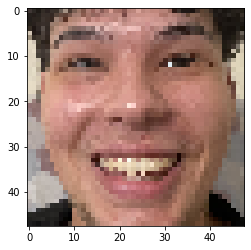

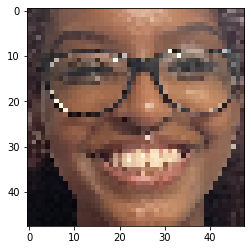

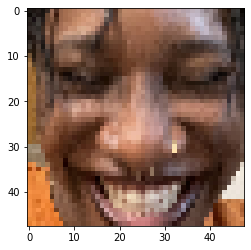

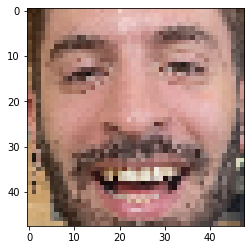

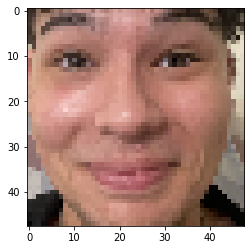

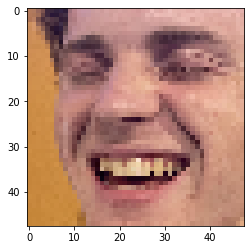

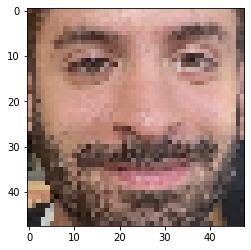

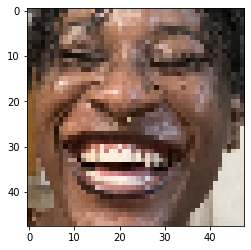

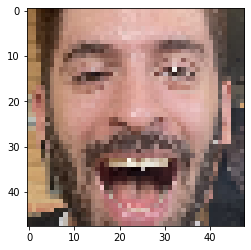

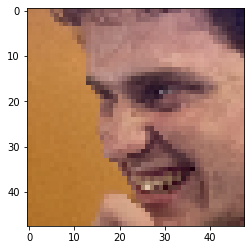

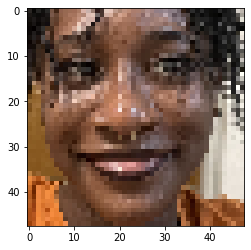

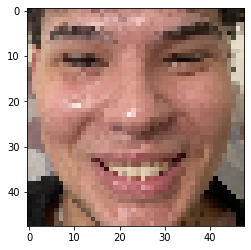

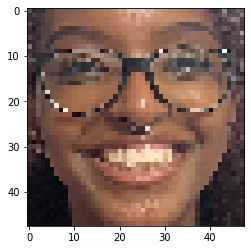

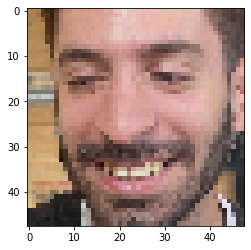

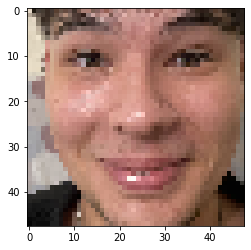

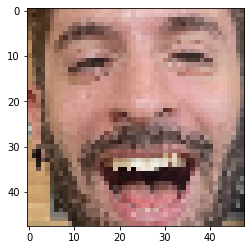

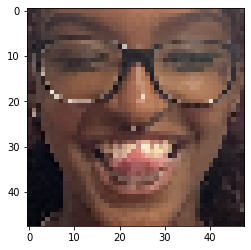

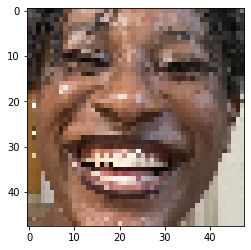

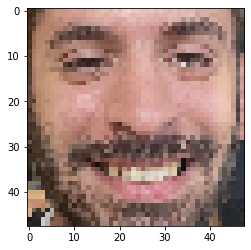

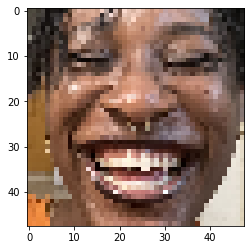

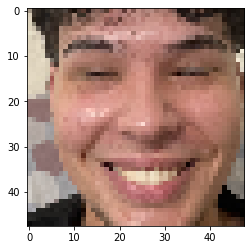

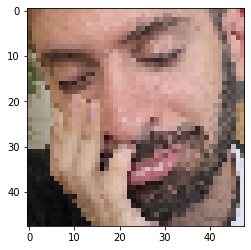

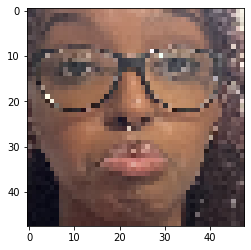

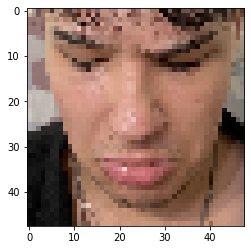

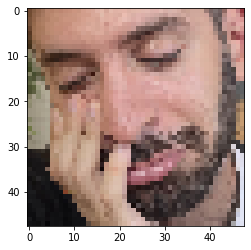

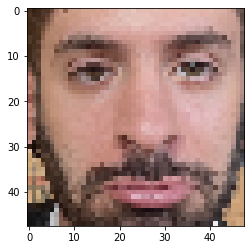

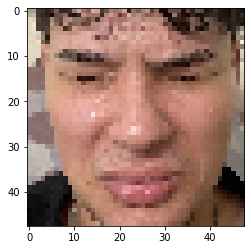

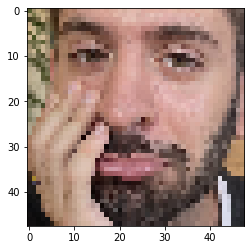

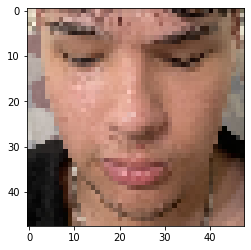

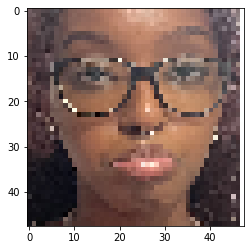

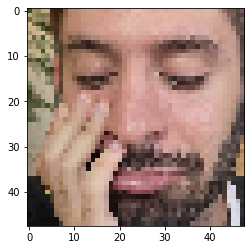

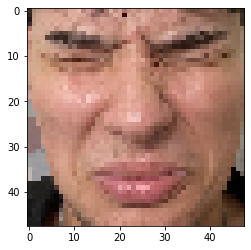

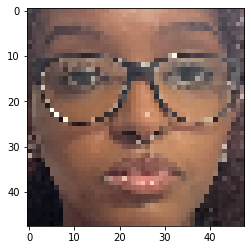

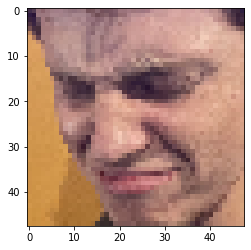

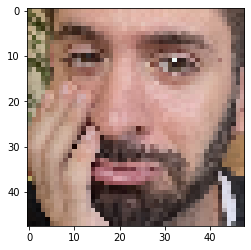

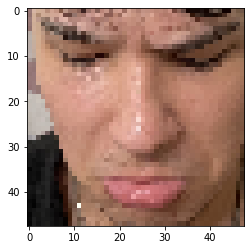

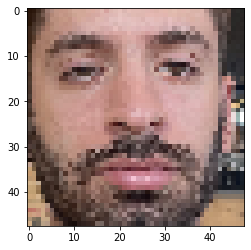

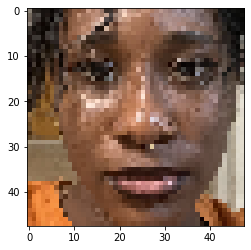

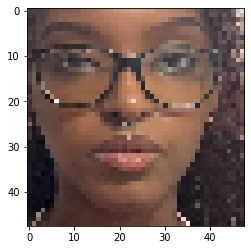

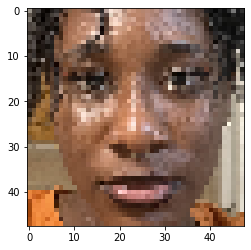

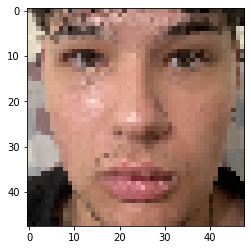

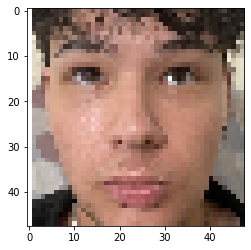

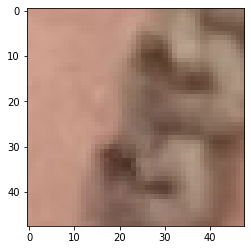

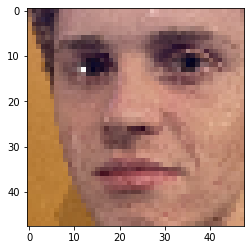

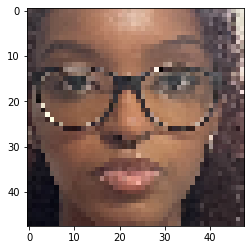

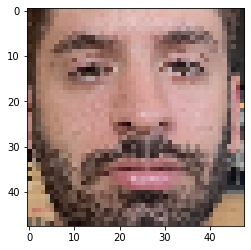

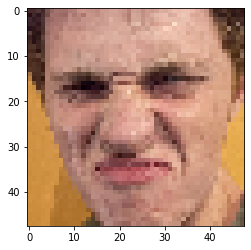

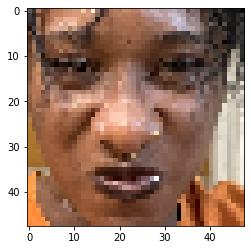

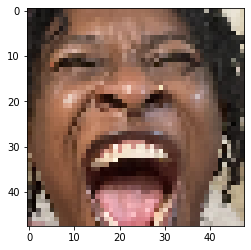

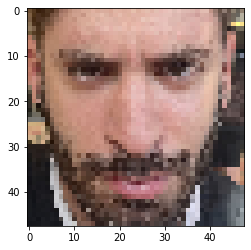

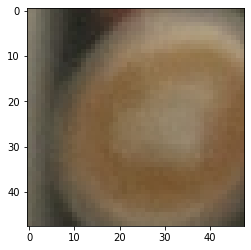

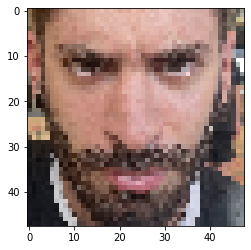

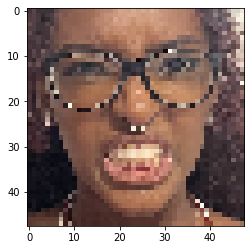

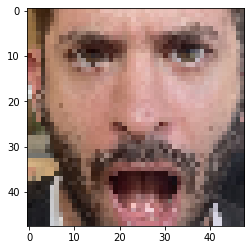

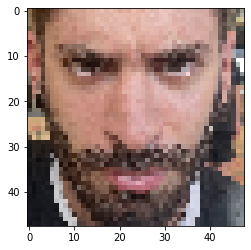

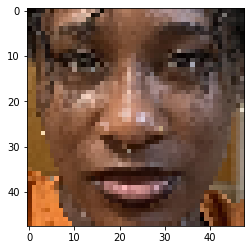

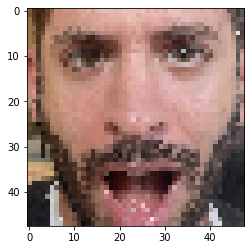

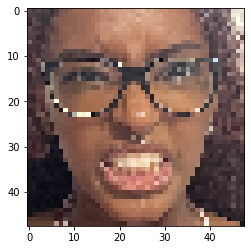

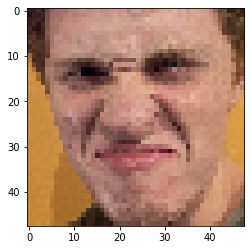

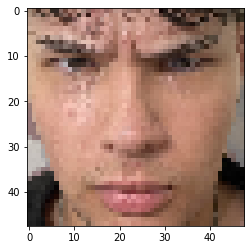

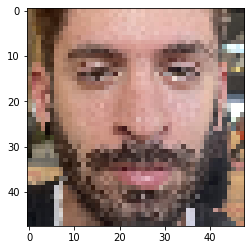

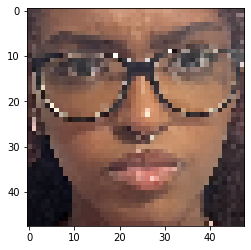

In [15]:
test_folder = ""
nao_x, nao_y = load_data_from_folder_test(test_folder)

nao_x = np.array(nao_x)
nao_y = np.array(nao_y)

In [16]:
label_encoder = LabelEncoder()
nao_y = label_encoder.fit_transform(nao_y)

In [20]:
test_loss, test_acc = inception_model.evaluate(nao_x, nao_y)
print(f'Test accuracy: {test_acc}')

2/2 [==============================] - 0s 33ms/step - loss: 3.2789 - accuracy: 0.5806
Test accuracy: 0.5806451439857483


# CNN

In [14]:
cnn_model = models.Sequential([
    layers.InputLayer((48,48,3),100),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4096, activation='relu'),
    layers.Dense(4, activation='softmax')
])


Epoch 1/40
210/210 [==============================] - 149s 703ms/step - loss: 1.3611 - accuracy: 0.3414 - val_loss: 1.3397 - val_accuracy: 0.3387
Epoch 2/40
210/210 [==============================] - 148s 702ms/step - loss: 1.2601 - accuracy: 0.4205 - val_loss: 1.1673 - val_accuracy: 0.4812
Epoch 3/40
210/210 [==============================] - 143s 680ms/step - loss: 1.1382 - accuracy: 0.4933 - val_loss: 1.0969 - val_accuracy: 0.5188
Epoch 4/40
210/210 [==============================] - 143s 680ms/step - loss: 1.0804 - accuracy: 0.5249 - val_loss: 1.0684 - val_accuracy: 0.5310
Epoch 5/40
210/210 [==============================] - 145s 688ms/step - loss: 1.0369 - accuracy: 0.5487 - val_loss: 1.0240 - val_accuracy: 0.5640
Epoch 6/40
210/210 [==============================] - 144s 684ms/step - loss: 0.9819 - accuracy: 0.5779 - val_loss: 1.0318 - val_accuracy: 0.5568
Epoch 7/40
210/210 [==============================] - 145s 692ms/step - loss: 0.9365 - accuracy: 0.6032 - val_loss: 0.9679 -

In [ ]:
cnn_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=40, batch_size=100, validation_data=(x_test, y_test))


test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# VGG

In [ ]:
vgg16_layer = models.Sequential([
    layers.InputLayer((48,48,3),32),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(1024, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation='softmax')
])

In [ ]:
vgg16_layer.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_layer.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y))


test_loss, test_acc = vgg16_layer.evaluate(test_x, test_y)
print(f'Test accuracy: {test_acc}')